# SNR

> Signal-to-noise ratios are commonly used in electrical engineering and signal processing. An SNR is tbe ratio between tbe signal and tbe noise component of a measurement. The general definition of an SNR in a digital environment is given in (4.9).
> $$ SNR = \frac{Var(Signal)}{Var(Noise)} $$

(Mangard S., Oswald E., Popp T. Power Analysis Attacks.. Revealing the Secrets of Smart Cards (Advances in Information Security) (2007) 4.3.2)

For precise computation refer to [Advanced side-channel Measurement and Testing](https://hss-opus.ub.ruhr-uni-bochum.de/opus4/frontdoor/deliver/index/docId/8024/file/diss.pdf) (Formula 5.5).

$$ \mathrm{SNR} = \frac{
    \mathrm{Var}_{\forall k \in \mathcal S}(\mathbf{\bar x}_k)
}{
    \mathrm{E}_{\forall k \in \mathcal S}\big(\mathrm{Var}_{\forall i}(\mathbf{x}_{k,i})\big)
} $$

In [1]:
from snr_leakage import datasets, poi_selectors
import numpy as np
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

In [9]:
poi_selector_name = 'subbytes'
poi_selector = poi_selectors[poi_selector_name]

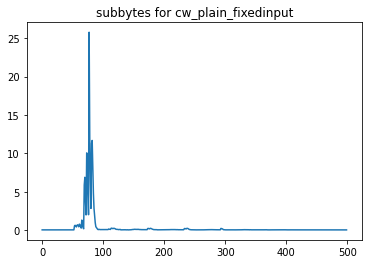

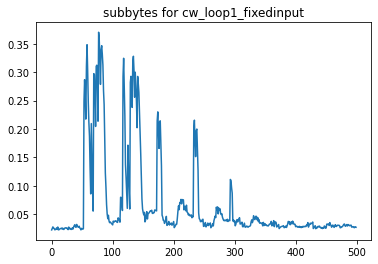

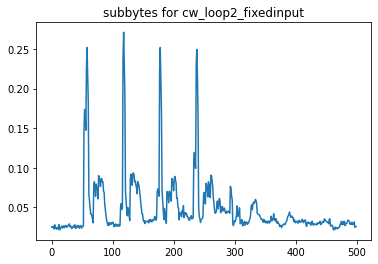

In [10]:
for dataname, data in datasets.items():
    trace = lascar.TraceBatchContainer(data['trace'], data)
    engine = lascar.SnrEngine(
        name=f'{poi_selector_name} for {dataname}',
        partition_function=poi_selectors[poi_selector_name],
        partition_range=range(9) if 'hw' in poi_selector_name else range(256),
    )

    session = lascar.Session(
        trace,
        engine=engine,
        output_method=lascar.MatPlotLibOutputMethod(engine),
        progressbar=False,
    )
    session.run(batch_size=100_000)
